## Decision Tree

TamilSelvan 

Raja - Machine Learning Model - decision tree

1000 labelled dataset - training dataset

100 new data

Questions - what is author, which year published - attribute selection measures

Raja Predicts whether Tamil will like the book or not - Output / label - Like - YES/NO

## Problem Statement - Classify incoming data for kyphosis occurence (yes/no)

Link : http://www.stat.umn.edu/RegGraph/data/Kyphosis.lsp

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

#### Import Dataset

In [2]:
df = pd.read_csv('dataset/kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


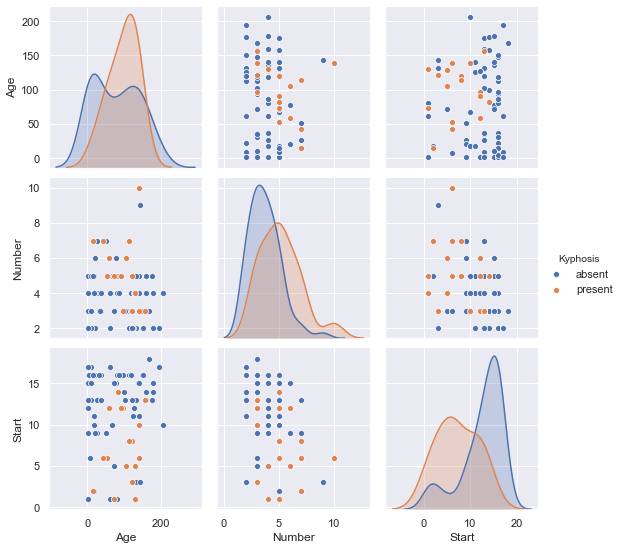

In [4]:
sns.pairplot(df,hue='Kyphosis')

### Train Test Split

In [5]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Train using decision tree classifier

In [7]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Prediction

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_train = dtree.predict(X_train)

print(f'Train Accuracy Score: {accuracy_score(y_pred_train,y_train)}')
print(f'\n\nConfusion Matrix:\n {confusion_matrix(y_pred_train,y_train)}')
print(f'\n\nClassification Report:\n {classification_report(y_pred_train,y_train)}')


Train Accuracy Score: 1.0


Confusion Matrix:
 [[50  0]
 [ 0 14]]


Classification Report:
               precision    recall  f1-score   support

      absent       1.00      1.00      1.00        50
     present       1.00      1.00      1.00        14

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [10]:
y_pred_test = dtree.predict(X_test)

print(f'Test Accuracy Score: {accuracy_score(y_pred_test,y_test)}')
print(f'\n\nConfusion Matrix:\n {confusion_matrix(y_pred_test,y_test)}')
print(f'\n\nClassification Report:\n {classification_report(y_pred_test,y_test)}')

Test Accuracy Score: 0.6470588235294118


Confusion Matrix:
 [[10  2]
 [ 4  1]]


Classification Report:
               precision    recall  f1-score   support

      absent       0.71      0.83      0.77        12
     present       0.33      0.20      0.25         5

    accuracy                           0.65        17
   macro avg       0.52      0.52      0.51        17
weighted avg       0.60      0.65      0.62        17

